In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/obesity-classification-dataset/Obesity Classification.csv


### Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn import set_config
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
import seaborn as sns
sns.set()
sns.set_theme(style="whitegrid")

### Loading Dataset

In [3]:
df = pd.read_csv("/kaggle/input/obesity-classification-dataset/Obesity Classification.csv")

### Exploring Dataset

In [4]:
df.head()

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,Male,175,80,25.3,Normal Weight
1,2,30,Female,160,60,22.5,Normal Weight
2,3,35,Male,180,90,27.3,Overweight
3,4,40,Female,150,50,20.0,Underweight
4,5,45,Male,190,100,31.2,Obese


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      108 non-null    int64  
 1   Age     108 non-null    int64  
 2   Gender  108 non-null    object 
 3   Height  108 non-null    int64  
 4   Weight  108 non-null    int64  
 5   BMI     108 non-null    float64
 6   Label   108 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 6.0+ KB


In [6]:
df.describe()

,ID,Age,Height,Weight,BMI
count,108.000000,108.000000,108.000000,108.000000,108.000000
mean,56.046296,46.555556,166.574074,59.490741,20.549074
std,31.917939,24.720620,27.873615,28.856233,7.583818
min,1.000000,11.000000,120.000000,10.000000,3.900000
25%,28.750000,27.000000,140.000000,35.000000,16.700000
50%,56.500000,42.500000,175.000000,55.000000,21.200000
75%,83.250000,59.250000,190.000000,85.000000,26.100000
max,110.000000,112.000000,210.000000,120.000000,37.200000


In [7]:
df.duplicated().sum()

0

**-> There are no duplicate values**

In [8]:
df["Label"].unique()

array(['Normal Weight', 'Overweight', 'Underweight', 'Obese'],
      dtype=object)

In [9]:
df.isnull().sum()

ID        0
Age       0
Gender    0
Height    0
Weight    0
BMI       0
Label     0
dtype: int64

**-> There are no null values**

### Data Cleaning
- `ID` will be dropped, it has no influence on `Label`
- `Gender` feature's value will be converted into male -> 0, female -> 1
- `Label` features' value will be coverted into,<br>
    **'Underweight' -> 0<br>**
    **'Normal Weight' -> 1<br>**
    **'Overweight' -> 2<br>**
    **'Obese' -> 3<br>**

In [10]:
df.drop(labels="ID", axis=1, inplace=True)

In [11]:
df["Gender_numeric"] = df["Gender"].replace({"Male": 0, "Female": 1})

In [12]:
df["Label_numeric"] = df["Label"].replace({"Underweight": 0, "Normal Weight": 1, "Overweight": 2, "Obese": 3})

In [13]:
df

,Age,Gender,Height,Weight,BMI,Label,Gender_numeric,Label_numeric
0,25,Male,175,80,25.3,Normal Weight,0,1
1,30,Female,160,60,22.5,Normal Weight,1,1
2,35,Male,180,90,27.3,Overweight,0,2
3,40,Female,150,50,20.0,Underweight,1,0
4,45,Male,190,100,31.2,Obese,0,3
...,...,...,...,...,...,...,...,...
103,11,Male,175,10,3.9,Underweight,0,0
104,16,Female,160,10,3.9,Underweight,1,0
105,21,Male,180,15,5.6,Underweight,0,0
106,26,Female,150,15,5.6,Underweight,1,0


### Data Visualization

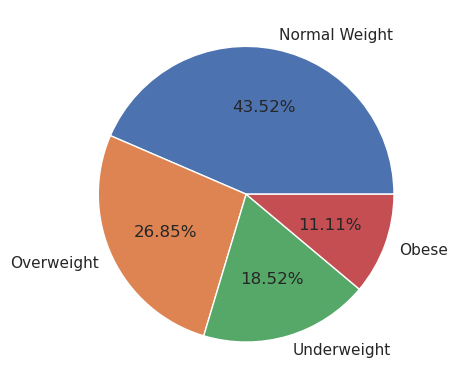

In [14]:
plt.pie(df["Label"].value_counts(), 
        labels=['Normal Weight', 'Overweight', 'Underweight', 'Obese'], 
        autopct="%0.2f%%")
plt.show()

In [15]:
df.columns.to_list()

['Age',
 'Gender',
 'Height',
 'Weight',
 'BMI',
 'Label',
 'Gender_numeric',
 'Label_numeric']

In [16]:
count_plt = ['Age', 'Gender', 'Height', 'Weight', 'BMI']

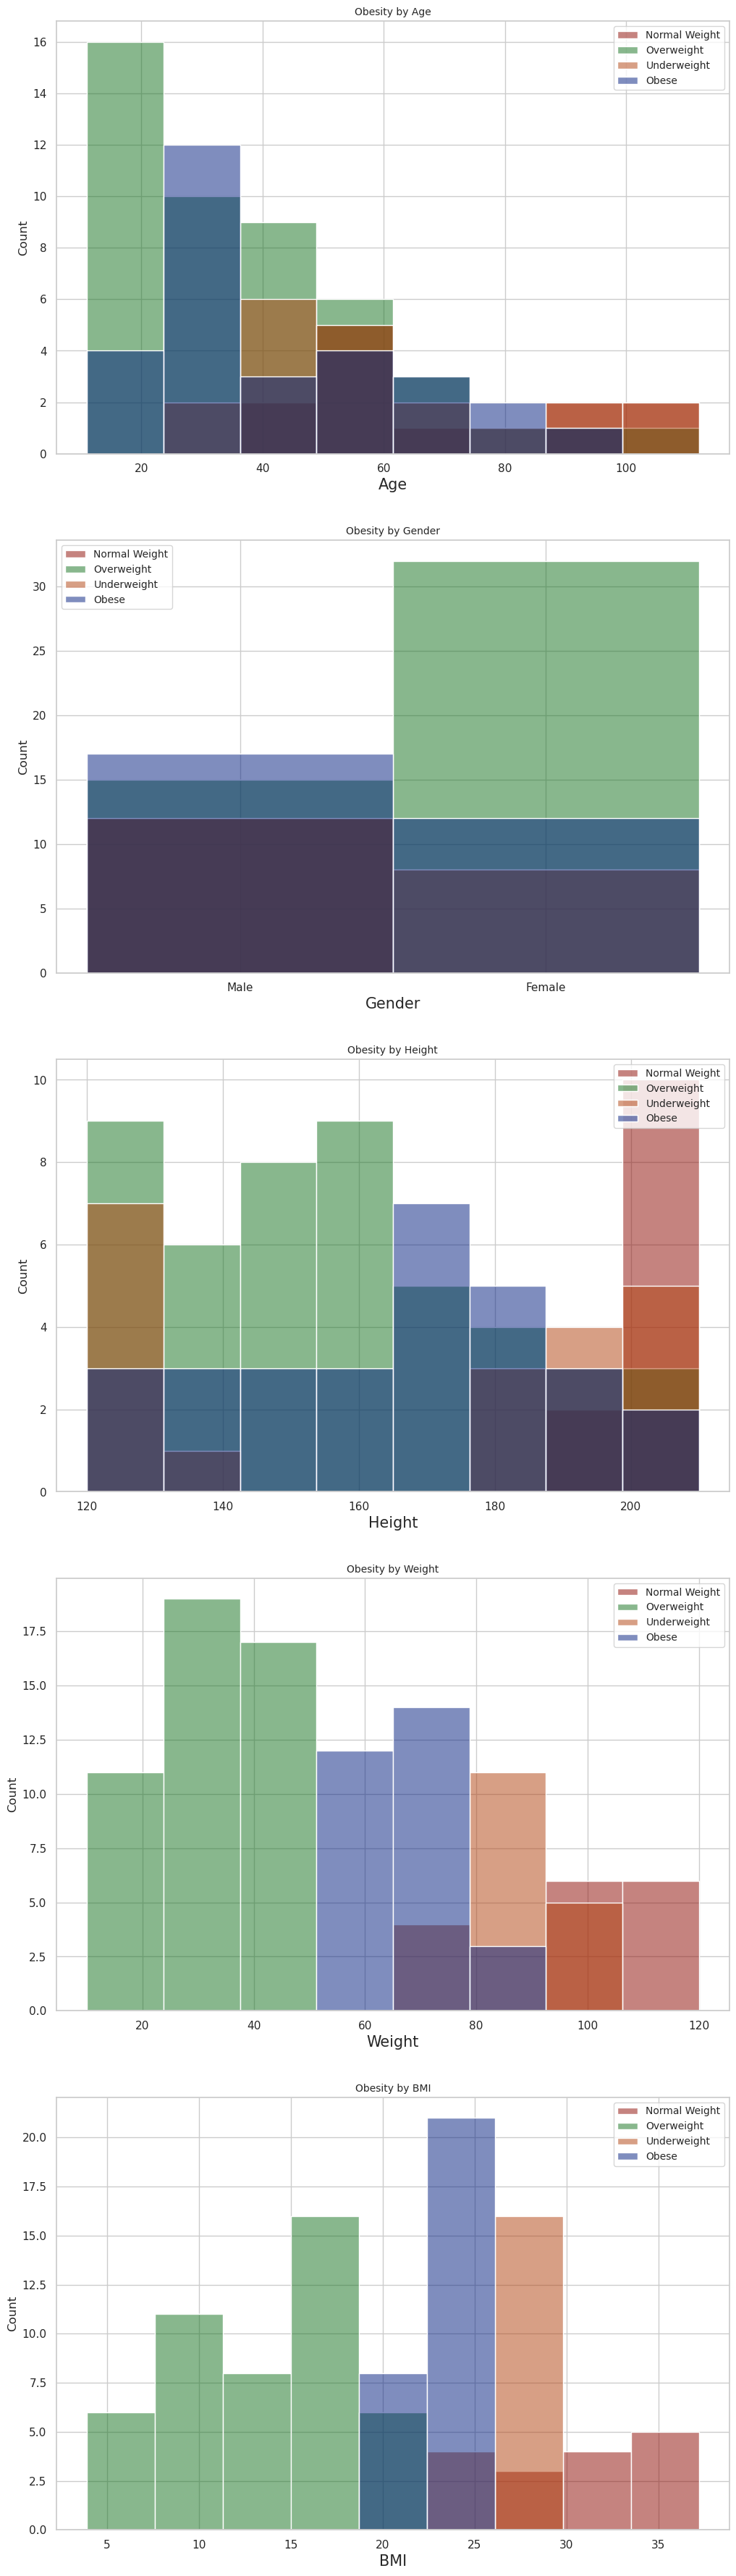

In [17]:
plt.figure(figsize=(12, 45))
for fe, x in zip(count_plt, range(0,len(count_plt))):
    plt.subplot(5, 1, x+1)
    sns.histplot(x=fe, hue='Label', data=df, palette="dark")
    plt.xlabel(fe, fontsize=15)
    plt.legend(fontsize=10, labels=['Normal Weight', 'Overweight', 'Underweight', 'Obese'])
    plt.title('Obesity by ' + fe, fontsize=10)

In [18]:
count_plt = ['Age', 'Gender_numeric', 'Height', 'Weight', 'BMI']

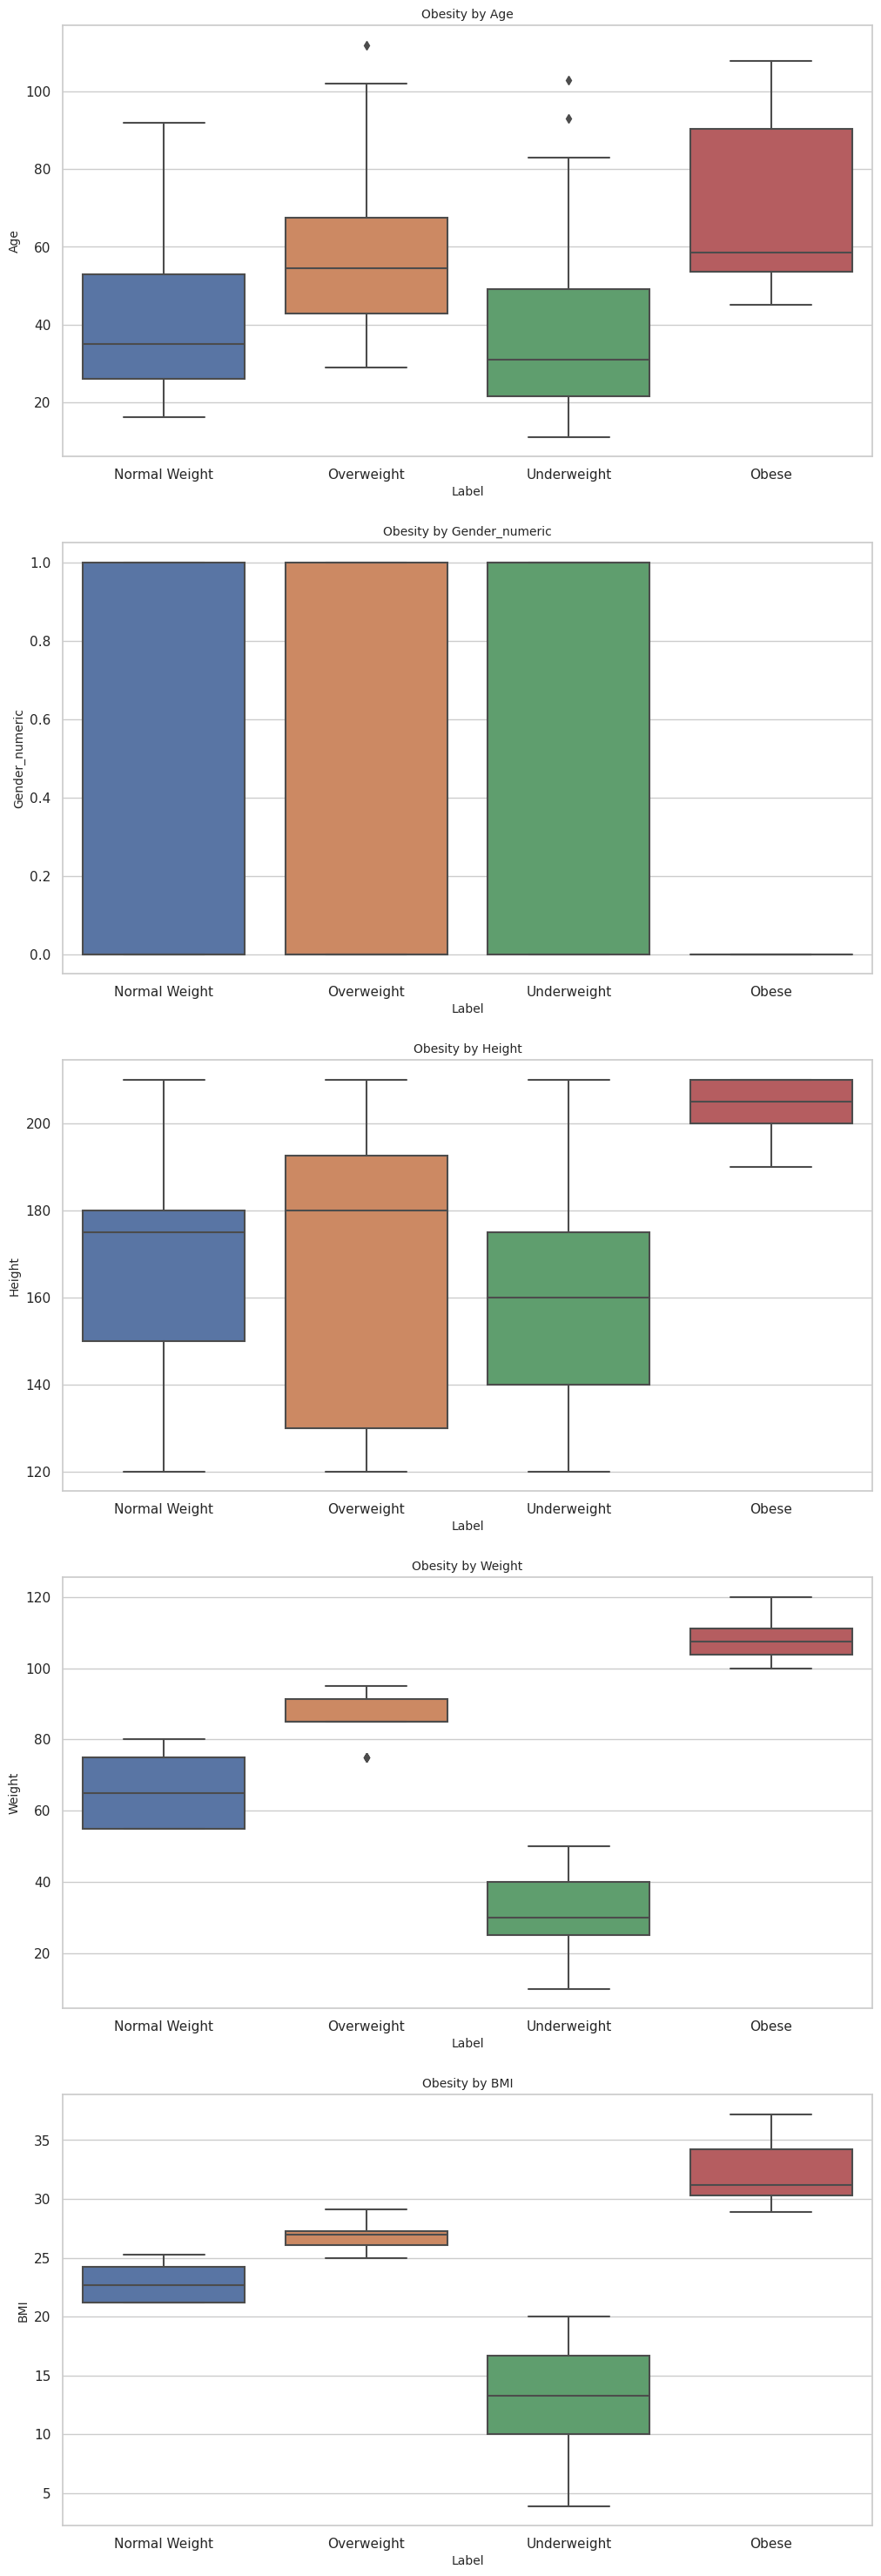

In [19]:
plt.figure(figsize=(12, 45))
for fe, x in zip(count_plt, range(0,len(count_plt))):
    plt.subplot(6, 1, x+1)
    sns.boxplot(x="Label", y=fe, data=df)
    plt.xlabel("Label", fontsize=10)
    plt.ylabel(fe, fontsize=10)
    plt.title('Obesity by ' + fe, fontsize=10)